In [2]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
housing_price_index = pd.read_csv('monthly-hpi.csv')
uemp = pd.read_csv('unemployment-macro.csv')
federal_funds_rate = pd.read_csv('fed_funds.csv')
gdp = pd.read_csv('gdp.csv')
shiller = pd.read_csv('shiller.csv')

In [5]:
df = (shiller.merge(housing_price_index,on='date')
      .merge(gdp,on='date')
      .merge(federal_funds_rate,on='date')
      .merge(uemp,on='date')
     )

In [7]:
housing_model = ols('housing_price_index ~ total_unemployed',data=df).fit()

In [15]:
hpi_summary0 = housing_model.summary()

In [16]:
hpi_summary0

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Sun, 02 Aug 2020   Prob (F-statistic):           2.71e-15
Time:                         10:39:02   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

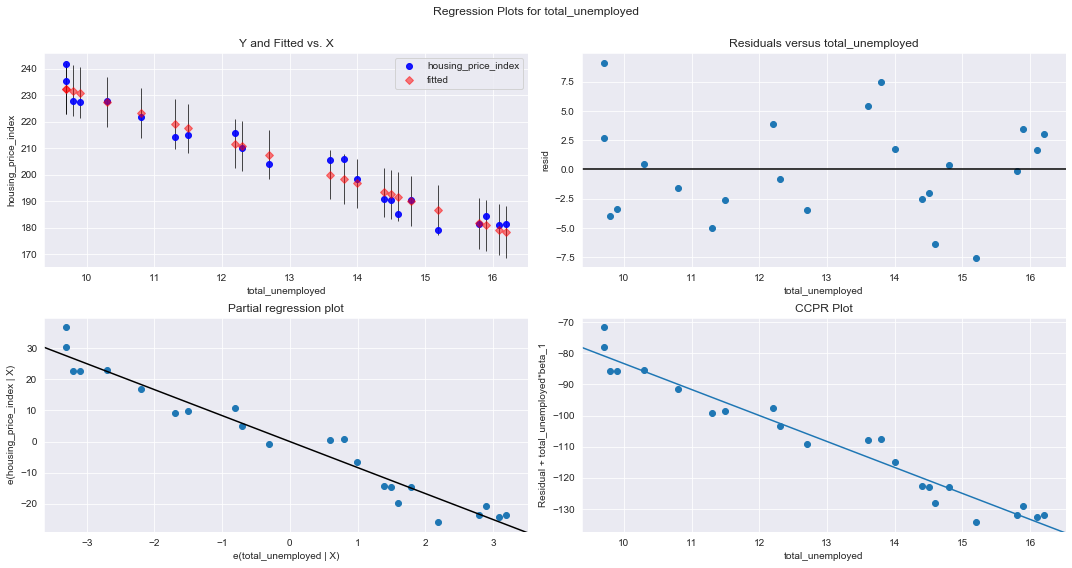

In [8]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(housing_model,'total_unemployed',fig=fig)

In [9]:
housing_model_2 = ols("""housing_price_index ~ total_unemployed
                                               + long_interest_rate
                                               + federal_funds_rate
                                               + consumer_price_index
                                               + gross_domestic_product""",data=df).fit()

In [11]:
hpi_summary = housing_model_2.summary()

In [12]:
hpi_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Sun, 02 Aug 2020   Prob (F-statistic):           7.32e-14
Time:                         10:35:33   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

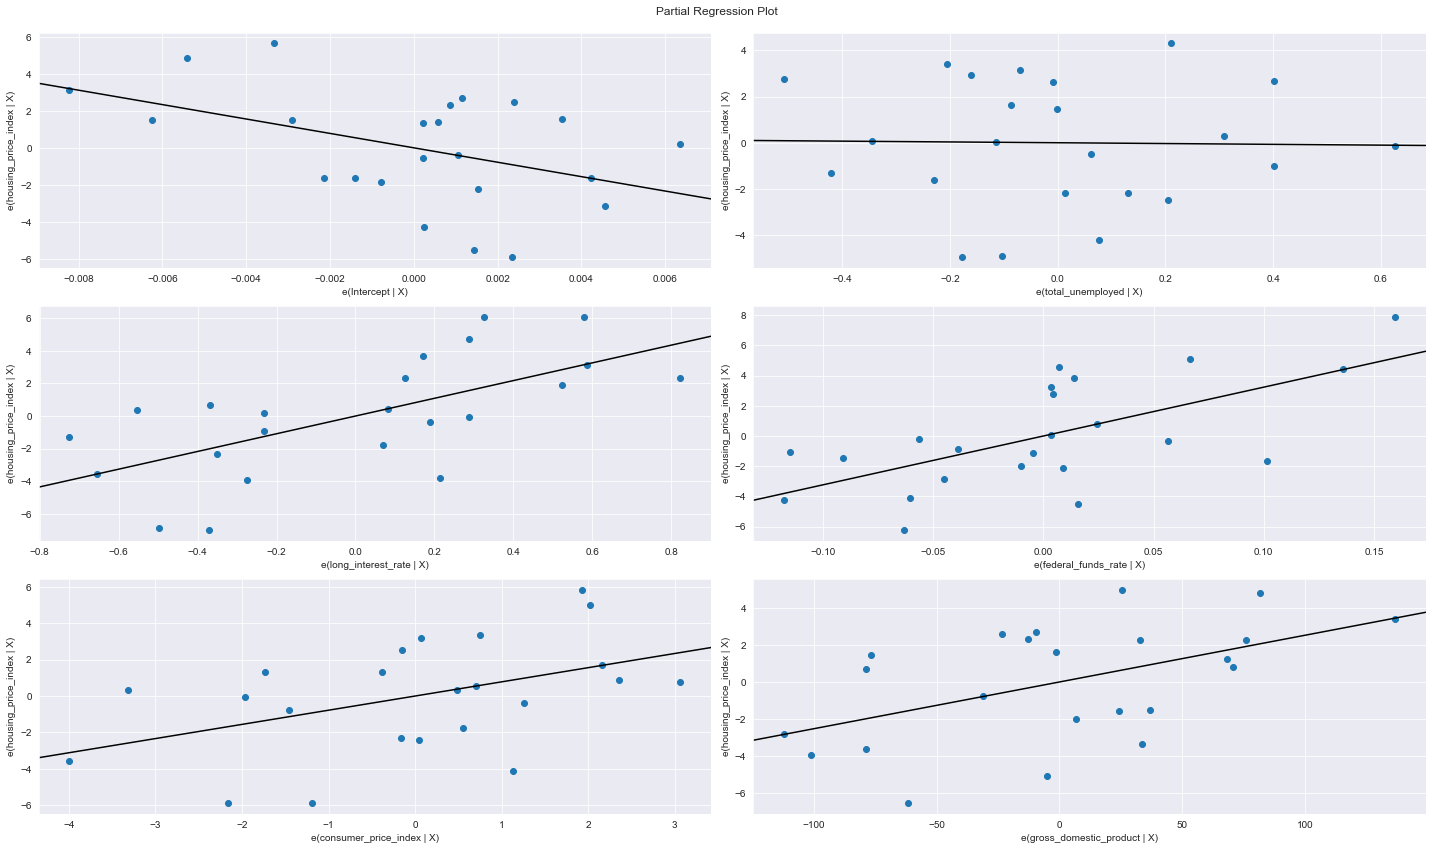

In [17]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model_2,fig=fig)